## 분산분석(ANOVA)
- 분산분석은 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석
- 종속변수는 연속형, 독립변수는 범주형이여야 한다.
- 개수에 따라 일원배치, 이원배치, 다원배치 분산분석으로 나눠진다.


-------

### 일원배치 분산분석(One-way ANOVA)
- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증 방법
- 모집단의 수에는 제한이 없고, 각 표본의 수는 같지 않아도 된다.
- F 검정 통계량을 이용한다.

#### F-value
- 집단 간 평균 제곱 = 집단 간 제곱합 / 자유도(집단수 - 1)
- 집단 내 평균 제곱 = 집단 내 제곱합 / 자유도(자료수 - 집단 수)
- 집단 간 평균 제곱 / 집단 내 평균 제곱
- F-value가 클수록 집단 간 평균의 차이는 크고 집단 내 평균의 차이는 작다고 볼 수 있다.

#### 가정
- 집단의 측정치는 서로 독립적이며, 정규분포를 따른다.
- 집단 측정치의 분산은 같다.

#### 가설
- 귀무가설 : k개의 집단 간 모평균에는 차이가 없다.
- 대립가설 : k개의 집단 간 모평균에는 차이가 있다.

#### 사후검정
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 때 (p-value < 0.05)
- 어떤 집단들에 대해 평균의 차이가 존재하는지 알아보기 위해 실시하는 분석
- 종류 : 던칸의 MRT, 피셔의 LSD, 튜키의 HSD 방법 등이 존재

#### 단계
1. 가설 수립
2. 정규성 검정 -> (No) -> stats.kruskal
3. 등분산 검정 -> (No) -> pinguin.welck_anova
4. f-oneway 검정
5. 사후검정

In [4]:
import scipy.stats as stats
import pandas as pd
iris_data = pd.read_csv("./data/iris.csv")
iris_data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris_data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris_data['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [5]:
target_list = iris_data['target'].unique()

setosa = iris_data[iris_data['target'] == target_list[0]]['sepal width']
versicolor = iris_data[iris_data['target'] == target_list[1]]['sepal width']
virginica = iris_data[iris_data['target'] == target_list[2]]['sepal width']
print(target_list)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


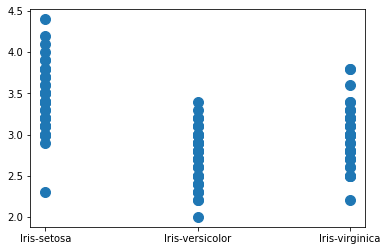

In [19]:
#import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x='target', y='sepal width',
                s=100,
                data=iris_data)

#### 가설 설정
- 귀무가설 : 집단 간 sepal width의 평균은 모두 같다.
- 대립가설 : 적어도 하나의 종에 대한 sepal width의 평균은 차이가 있다.

In [21]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


- 세 집단의 데이터 모두 p-value가 0.05 이상이므로 정규성을 만족한다.

In [22]:
print(stats.levene(setosa, versicolor, virginica))

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)


- p-value가 0.05이상이므로 세 집단 간 분산은 같다

In [23]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

- p-value가 0.05보다 작으므로 집단 간 sepal width의 평균은 모두 같다는 귀무가설을 기각한다.
- 즉 세 집단의 평균은 차이가 있다.

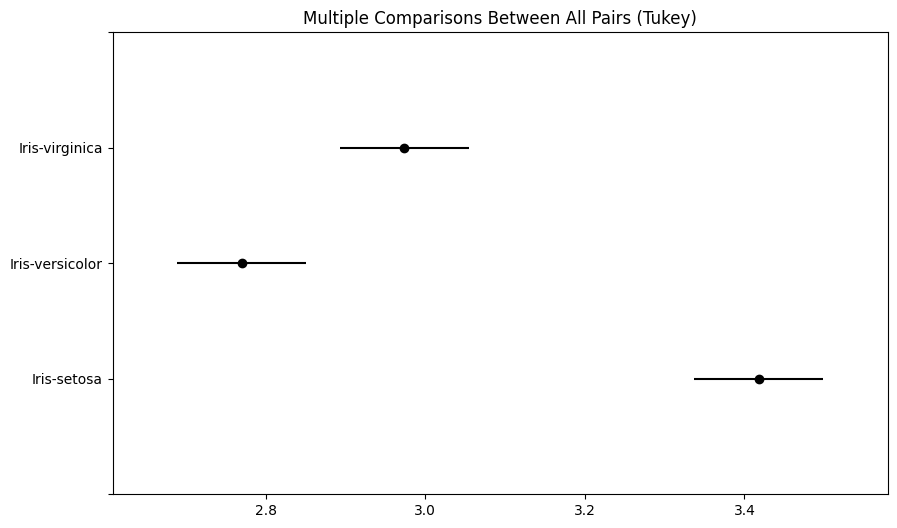

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=iris_data['sepal width'], groups=iris_data['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [9]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


- 사후분석 결과 모든 비교에 대해 p-value가 0.05보다 작으므로 모든 종에 대해 평균 값은 통계적으로 유의한 차이가 있다.

In [10]:
## 만약 정규성을 만족하지 못했을 경우
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [12]:
## 만약 등분산성을 만족하지 못했을 경우
#!pip install pingouin
import pingouin as pg
pg.welch_anova(data = iris_data, dv = 'sepal width', between = 'target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


---------------

### 이원배치 분산분석(Two-way ANOVA)
- 분산분석에서 하나의 종속변수(연속형)에 대한 두 개의 독립변수(범주형)에 대한 영향을 알아보기 위한 검증 방법
- ex. 성별과 학년에 따른 시험점수 차이
- 두 독립변수 사이에 상관관계가 있는지 살펴보는 교호작용에 대한 검증이 반드시 진행되어야 한다
- F 검정 통계량을 이용한다.

#### 가정
- 집단의 측정치는 서로 독립적이며 정규분포를 따른다.
- 집단 측정치의 분산은 같다.

#### 가설
- 귀무가설1 : a와 b변수의 상호작용 효과가 없다.
- 귀무가설2 : a변수에 따른 종속변수의 값에는 차이가 없다.
- 귀무가설3 : b변수에 따른 종속변수의 값에는 차이가 없다.
- 대립가설1 : a와 b변수의 상호작용 효과가 있다.
- 대립가설2 : a변수에 따른 종속변수의 값에는 차이가 있다.
- 대립가설3 : b변수에 따른 종속변수의 값에는 차이가 있다.

#### 사후검정
- 분산분석 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 증명되었을 때 어떤 집단에서 평균의 차이가 존재하는지 알아보기 위해 시행

#### 단계
- 일원배치 분산분석과 분석 단계는 동일하나 범주형이 2개라는 점에서 가설의 차이가 존재한다.

In [13]:
## 변속기 종류와 실런더 개수에 따라 주행거리 평균에 유의미한 차이가 있는가에 대한 검정
import pandas as pd
mtcars = pd.read_csv("./data/mtcars.csv")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


#### 가설

1. 교호작용 검정
- 귀무가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
- 대립가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.

2. 주효과 검정 1
- 귀무가설 : 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
- 대립가설 : 실린더 개수에 따른 주행거리의 차이는 존재한다.

3. 주효과 검정 2
- 귀무가설 : 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.
- 대립가설 : 변속기 종류에 따른 주행거리의 차이는 존재한다.

In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = "mpg ~ C(cyl) + C(am) + C(cyl):C(am)"
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


1. 교호작용 검정 해석
- 교호작용에 대한 p-value가 0.26으로 0.05보다 크므로 교호작용이 존재하지 않는다는 귀무가설을 기각하지 않는다.
- 교호작용이 존재하지 않을 때 나머지 주효과 검정이 의미를 갖는다.

2. 주효과 검정 1 해석
- cyl 변수에 대한 p-value는 0.05보다 작으므로 귀무가설을 기각하고 실린더 개수에 따라 주행거리 간 유의미한 차이는 존재한다고 해석할 수 있다.

3. 주효과 검정 2 해석
- am 변수에 대한 p-value는 0.056으로 0.05보다 크므로 변속기 종류에 따른 주행거리의 차이가 존재하지 않는다는 귀무가설을 기각하지 않는다.

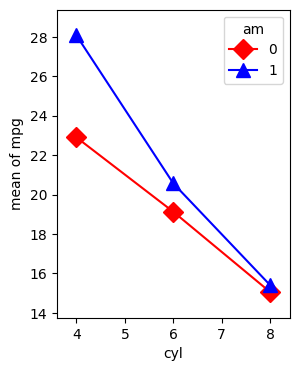

In [17]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(3, 4))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

- 교호작용 검정에 대한 가장 확실한 방법은 위의 그래프를 확인하는 방법이다.
- 만약 두 선이 교차하고 있을 경우 두 변수간에는 상호작용이 존재한다고 해석한다.